#**-------------------------step1-------------------**

Goal: Get email data for training.

Downloaded the Enron email dataset from Kaggle.

xtracted the main message content from each email.

Created a CSV file containing email texts.

#REQUIRED LIBRARIES

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset

In [7]:
import pandas as pd

df = pd.read_csv(
    "emails.csv",
    on_bad_lines='skip',
    quoting=3,
    encoding='utf-8',
    engine='python'
)

# Show dataset shape and first few rows
print("Shape of dataset:", df.shape)
df.head(5)



Shape of dataset: (574032, 2)


,"""file""","""message"""
0,"""allen-p/_sent_mail/1.""","""Message-ID: <18782981.1075855378110.JavaMail...."
1,Date: Mon,14 May 2001 16:39:00 -0700 (PDT)
2,From: phillip.allen@enron.com,None
3,To: tim.belden@enron.com,None
4,Subject:,None


#step 2

#**Preprocess the Data**

Removed email headers like "From:", "To:", "Subject:".

Removed quoted replies and signatures.

Converted all text to lowercase.

Removed extra spaces and symbols.



In [4]:
print(df.columns.tolist())


['"file"', '"message"']


In [11]:
def final_clean(text):
    try:
        lines = text.split('\n')
        content_lines = []
        for line in lines:
            line = line.strip()

            # Remove common header fields
            if re.match(r"^(from:|to:|date:|subject:|message-id:)", line.lower()):
                continue

            # Stop at signature
            if line.lower().startswith(('--', 'thanks', 'regards', 'best')):
                break

            content_lines.append(line)

        content = ' '.join(content_lines)
        content = re.sub(r'\s+', ' ', content).strip().lower()
        return content
    except:
        return ""


In [12]:
df['clean_body'] = df['clean_body'].apply(final_clean)


In [13]:
df[['file', 'clean_body']].head(5)


,file,clean_body
0,"""allen-p/_sent_mail/1.""","""message-id: <18782981.1075855378110.javamail...."
1,Date: Mon,14 may 2001 16:39:00 -0700 (pdt)
2,From: phillip.allen@enron.com,
3,To: tim.belden@enron.com,
4,Subject:,


#Generate Sentence Embeddings using Sentence-BERT

Goal: Convert emails into numbers (vectors) that a machine can understand.

Used the Sentence-BERT model (all-MiniLM-L6-v2).

Passed each cleaned email through the model.

Got 384-dimensional embeddings for each email.

Saved all embeddings in a file named email_embeddings.npy.

In [14]:
!pip install -q sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.1 MB/s eta 0:00:00


In [15]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Load pretrained Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')


df = df[df['clean_body'].str.strip() != ""]


embeddings = model.encode(df['clean_body'].tolist(), show_progress_bar=True)


embeddings = np.array(embeddings)


print("Embeddings shape:", embeddings.shape)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/422 [00:00<?, ?it/s]

Embeddings shape: (13500, 384)


In [16]:
np.save("email_embeddings.npy", embeddings)
df.to_csv("emails_with_clean_text.csv", index=False)


#Step4 :Implement Similarity Matching

Goal: Find the most similar past emails to a new input email.

Cleaned the new input email.

Converted it into an embedding using the same model.

Compared it with all saved embeddings using cosine similarity.

Selected the top 2–3 similar matches.



    

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load embeddings and DataFrame
embeddings = np.load("email_embeddings.npy")
df = pd.read_csv("emails_with_clean_text.csv")

# Encode the new input email
def get_reply_suggestions(new_email_text, top_k=3):
    # Clean the input
    from sentence_transformers import SentenceTransformer
    model = SentenceTransformer('all-MiniLM-L6-v2')
    new_clean = final_clean(new_email_text)

    if not new_clean:
        return ["(Input email too short or empty after cleaning)"]

    new_embedding = model.encode([new_clean])

    # Compute cosine similarity
    similarities = cosine_similarity(new_embedding, embeddings)[0]

    # Get top k matches
    top_indices = similarities.argsort()[-top_k:][::-1]

    # Show top matching replies
    return df.iloc[top_indices][['clean_body', 'file']]

# 🔍 Test it
sample_email = "Hi, can you please send me the report for last quarter?"
suggestions = get_reply_suggestions(sample_email)
suggestions


,clean_body,file
8658,midweek report 12/19/01,Subject: Western Price Survey
5961,i'll send our report along--but it looks like,conference this morning
6181,please insure that they receive a copy of this...,If there are any personnel in your group that ...


Step 5: Build a Simple UI

Create a web page where users can test the system



Built a web app using Streamlit.

Added a text box for users to paste an email.

Added a button to get reply suggestions.

Showed the top 3 smart suggestions based on similarity.

Ran the app locally in VS Code (http://localhost:8501).

#Streamlit UI

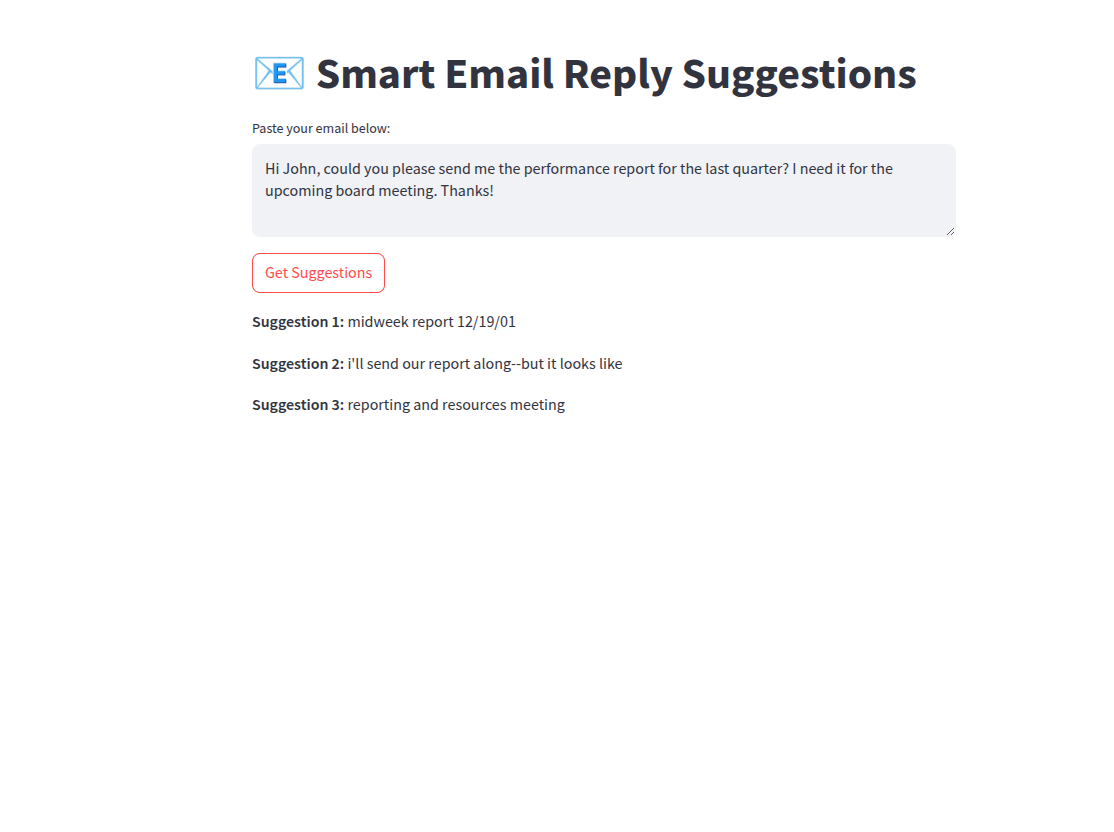